### CONTEXT

Marketing is very crucial for the growth and sustainability of a business. They can build the company's brand, engage customers & understand their needs, increase sales and grow revenue of the company. By understanding the customer needs, marketers can launch targeted marketing campaign. In this case study, we have extensive data of customers for the past 6 months. The marketing dept of the company wants to do targetted marketing campaign by dividing customers into 3 distinctive groups.

### Import Libraries And Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('F:\Data science\Datasets\Human resources\Marketing_data.csv')

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Attribute Information

1) CUSTID: Identification of Credit Card holder 
2) BALANCE: Balance amount left in customer's account to make purchases
3) BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4) PURCHASES: Amount of purchases made from account
5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
6) INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7) CASH_ADVANCE: Cash in advance given by the user
8) PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9) ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10) PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11) CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12) CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
13) PURCHASES_TRX: Number of purchase transactions made
14) CREDIT_LIMIT: Limit of Credit Card for user
15) PAYMENTS: Amount of Payment done by user
16) MINIMUM_PAYMENTS: Minimum amount of payments made by user  
17) PRC_FULL_PAYMENT: Percent of full payment paid by user
18) TENURE: Tenure of credit card service for user

In [7]:
df.shape

(8950, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mean balance is $1564 
Balance frequency is frequently updated on average ~0.9
Purchases average is $1000
One off purchase average is ~$600
Average purchases frequency is around 0.5
Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
Average credit limit ~ 4500
Percent of full payment is 15%
Average tenure is 11 years

In [10]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [11]:
df[df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


This customer made 123 cash advance transactions!! and never paid credit card in full

### Visualize And Explore Dataset

<AxesSubplot:>

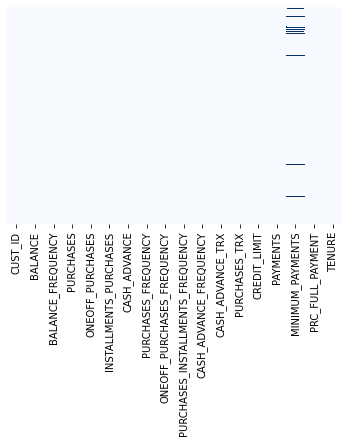

In [12]:
# Lets see for missing values in data

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [13]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
# fill up the missing values with mean in Minimum payments column.

df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [17]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
# Lets check any duplicate values..

df.duplicated().sum()

0

In [19]:
# Lets drop cust_id which is least significant

df.drop('CUST_ID', axis=1, inplace= True)

In [20]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
n = len(df.columns)
n

17

In [22]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

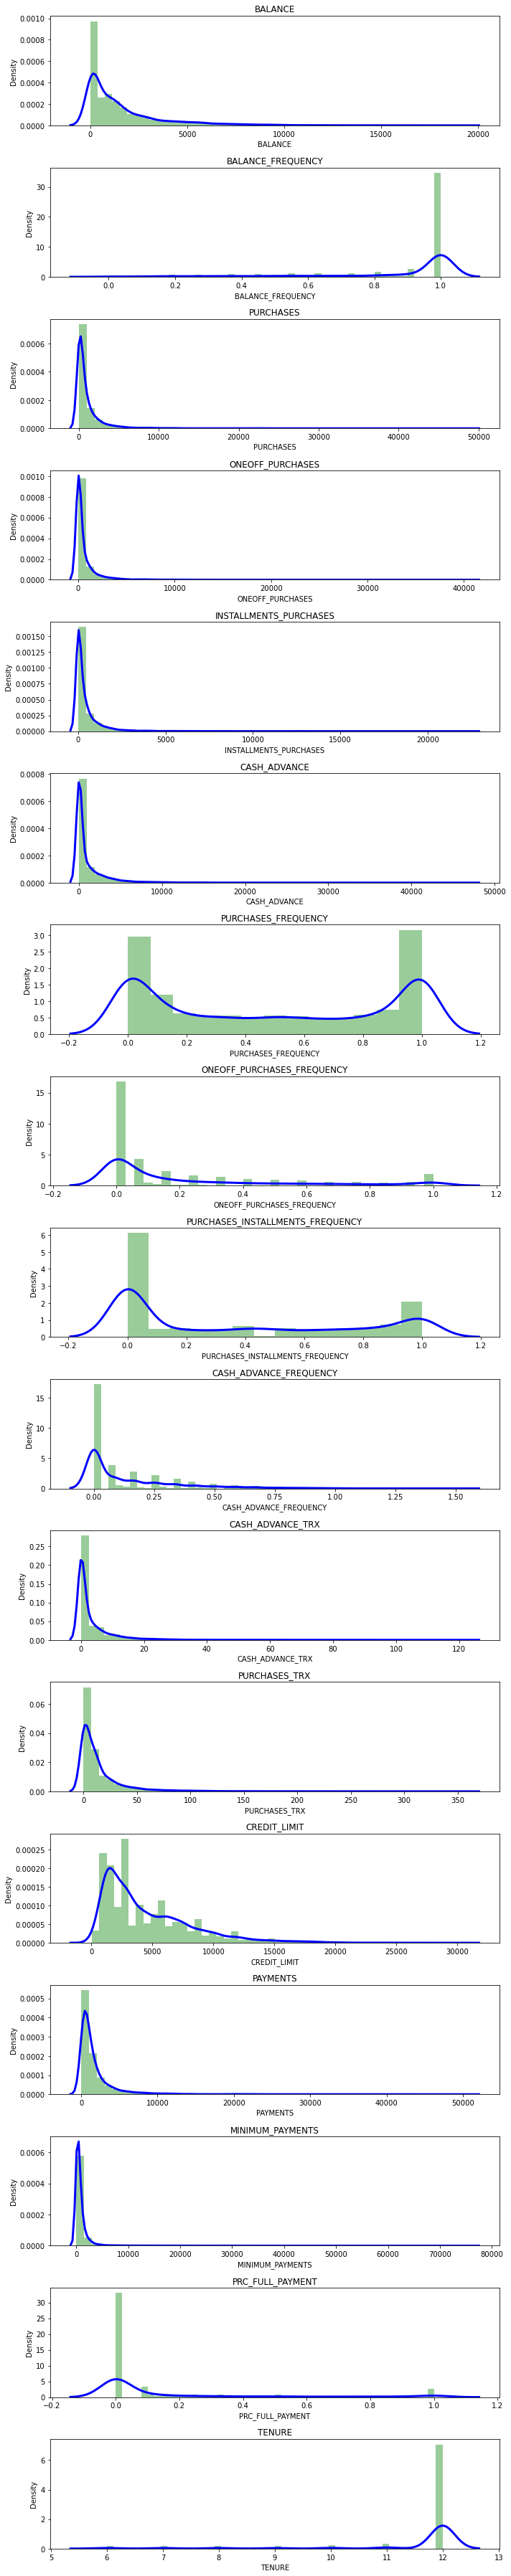

In [23]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    plt.title(df.columns[i])
    
plt.tight_layout()

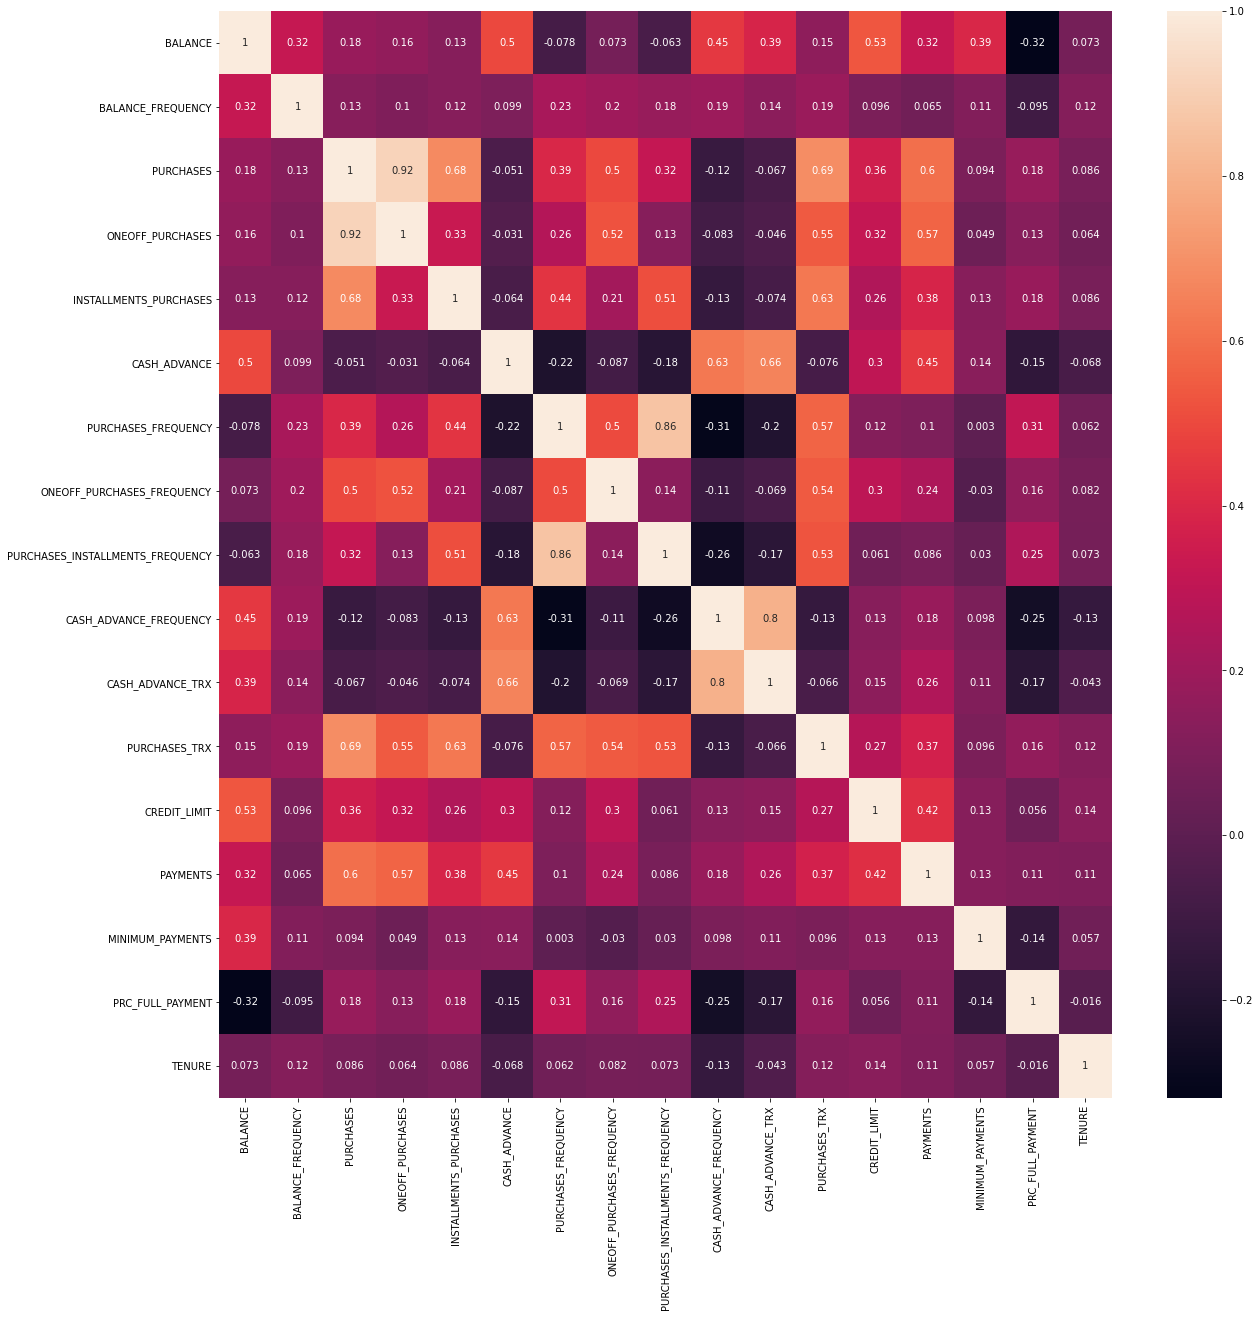

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True)
plt.show()

### Finding The Optimal Number Clusters Using Elbow Method

In [25]:
# Lets scale the data first

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [26]:
df_scaled.shape

(8950, 17)

In [27]:
scores_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

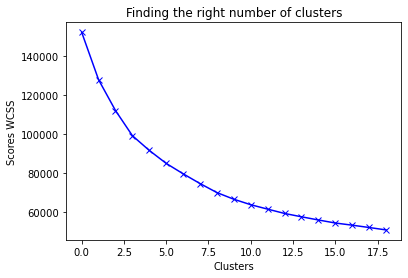

In [28]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
However, the values does not reduce linearly until 8th cluster. Let's choose the number of clusters to be 8

### Apply KMeans Method

In [29]:
kmeans= KMeans(8)
kmeans.fit(df_scaled)
labels= kmeans.labels_

In [30]:
labels

array([7, 5, 1, ..., 6, 6, 6])

In [31]:
kmeans.cluster_centers_.shape

(8, 17)

In [32]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns= [df.columns])

In [33]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.364273,0.332878,-0.036483,-0.244171,0.362131,-0.363350,0.994313,-0.386891,1.209945,-0.475063,-0.360914,0.189369,-0.261970,-0.215890,-0.031722,0.317193,0.257227
1,-0.164853,0.392081,0.453816,0.593754,-0.017944,-0.333793,0.944039,1.879581,0.089306,-0.407420,-0.323238,0.524310,0.373164,0.087097,-0.162498,0.407198,0.261639
2,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
3,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175963,-0.192408,-0.256478,0.283762,0.199336
4,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
5,1.688661,0.395842,-0.217727,-0.156313,-0.227707,2.016177,-0.477411,-0.213849,-0.413600,1.920993,1.935864,-0.265959,1.027511,0.808437,0.554874,-0.395309,0.070564
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
7,0.016148,0.403914,-0.361130,-0.246678,-0.400584,-0.091774,-0.863498,-0.409655,-0.755110,0.108263,-0.025918,-0.485709,-0.304294,-0.249921,-0.010132,-0.457171,0.272624


In [34]:
labels.shape

(8950,)

In [35]:
# Concatenate the clusters labels to our original dataframe

df_cluster = pd.concat([df,pd.DataFrame({'cluster':labels})], axis=1)
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


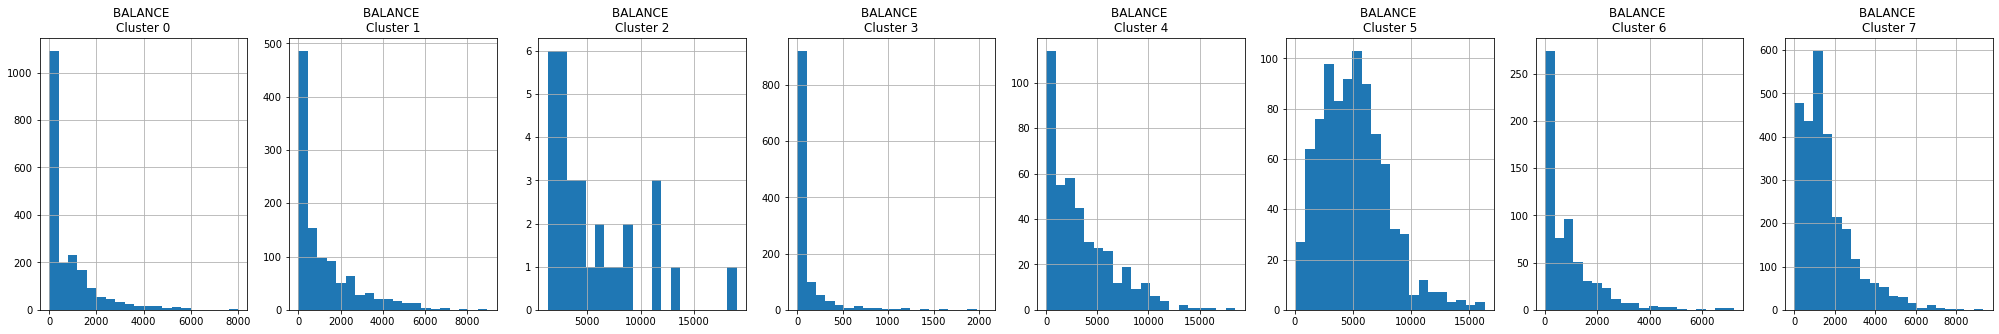

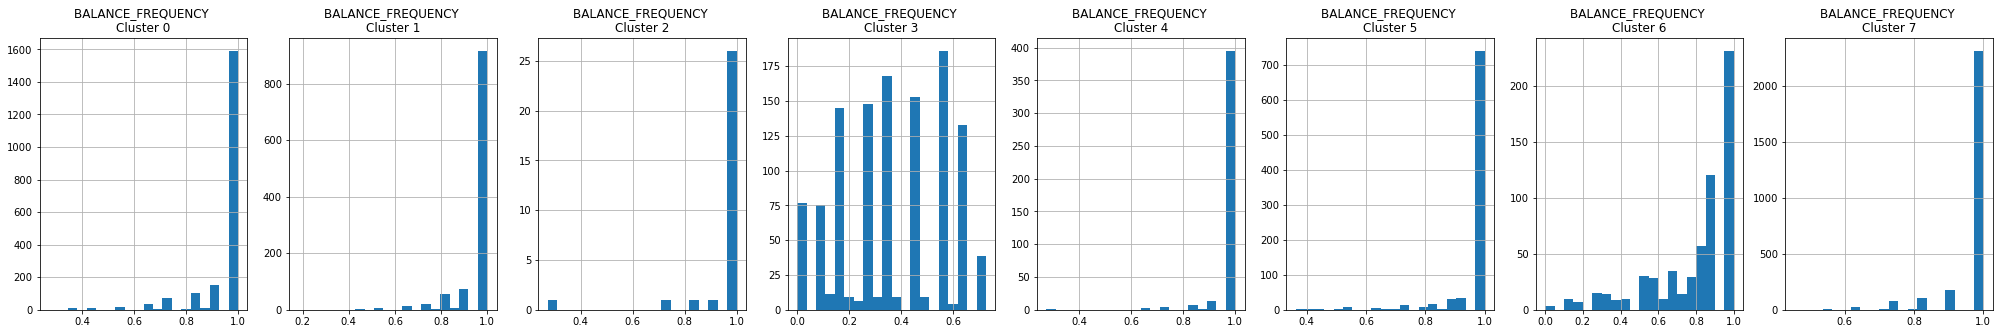

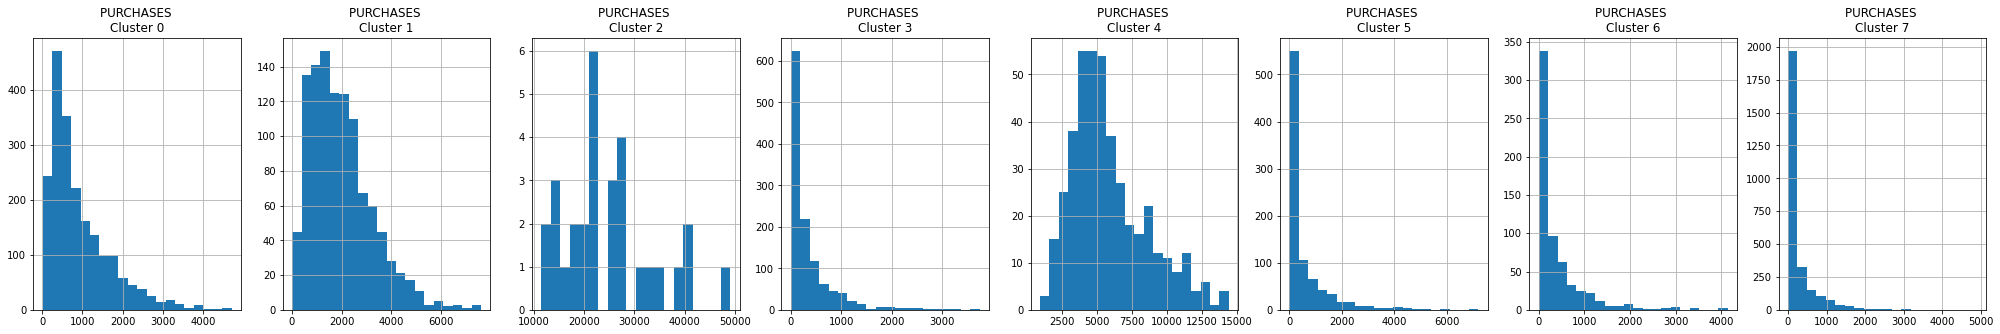

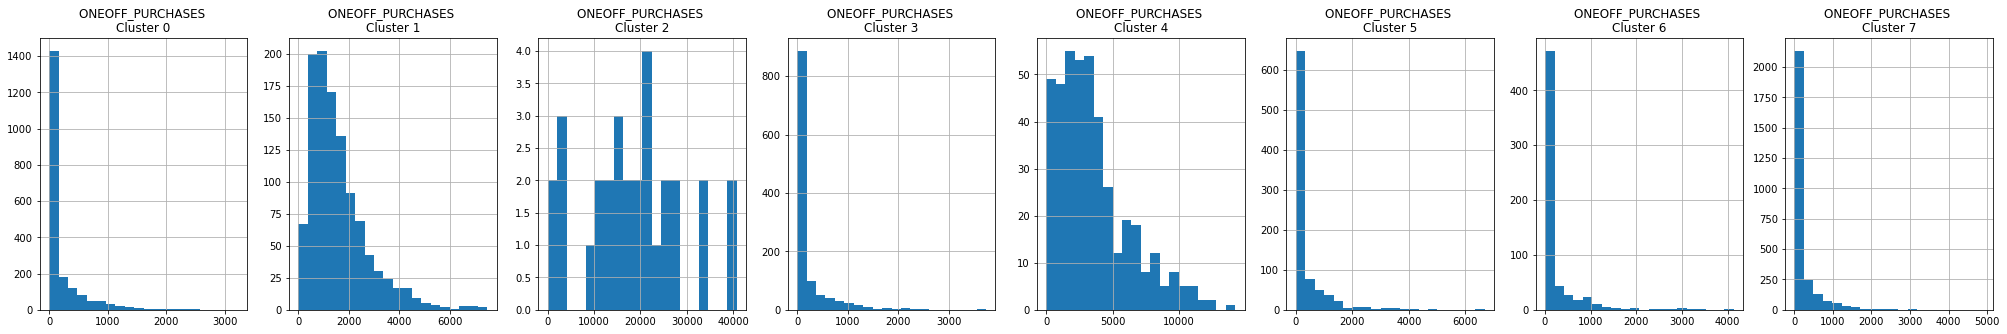

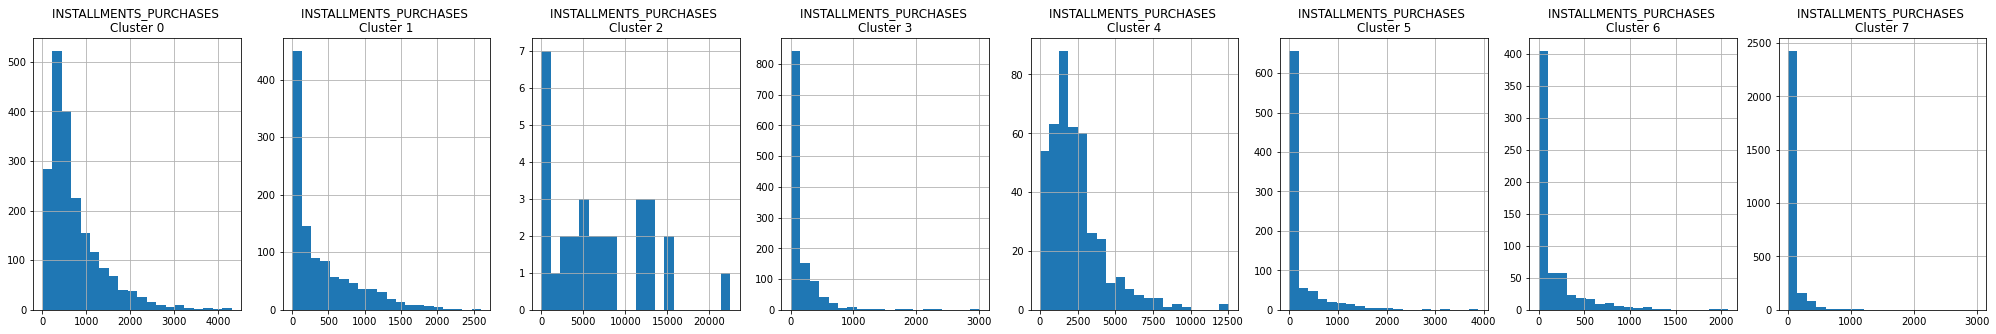

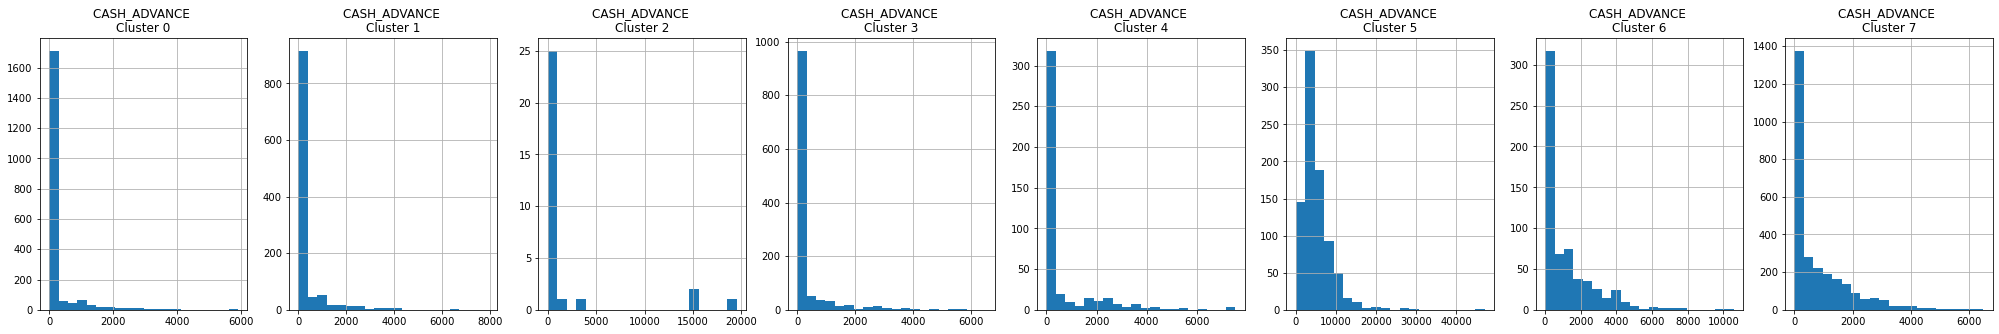

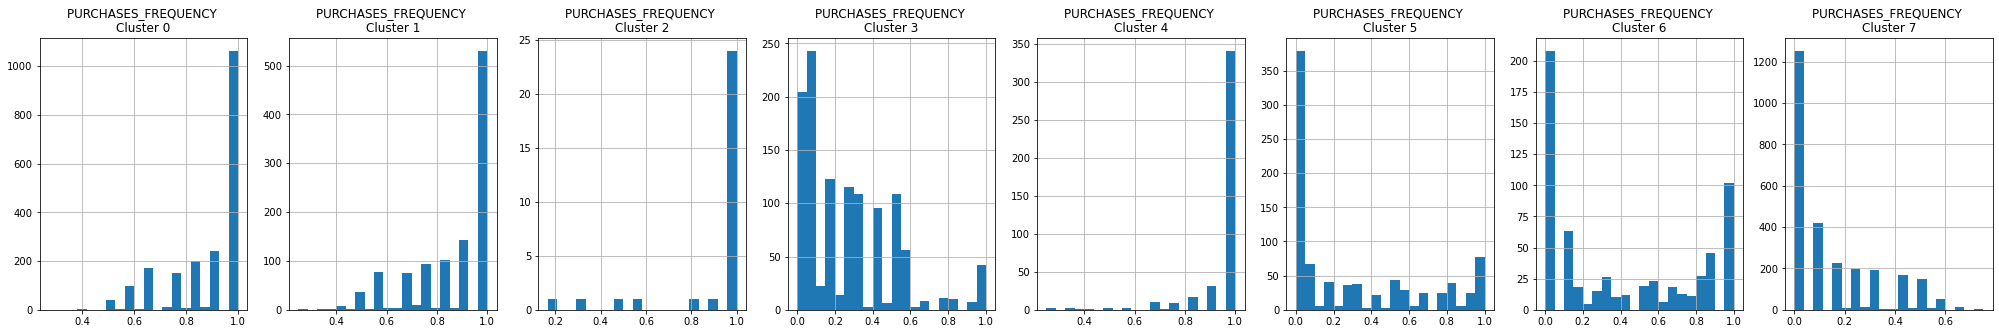

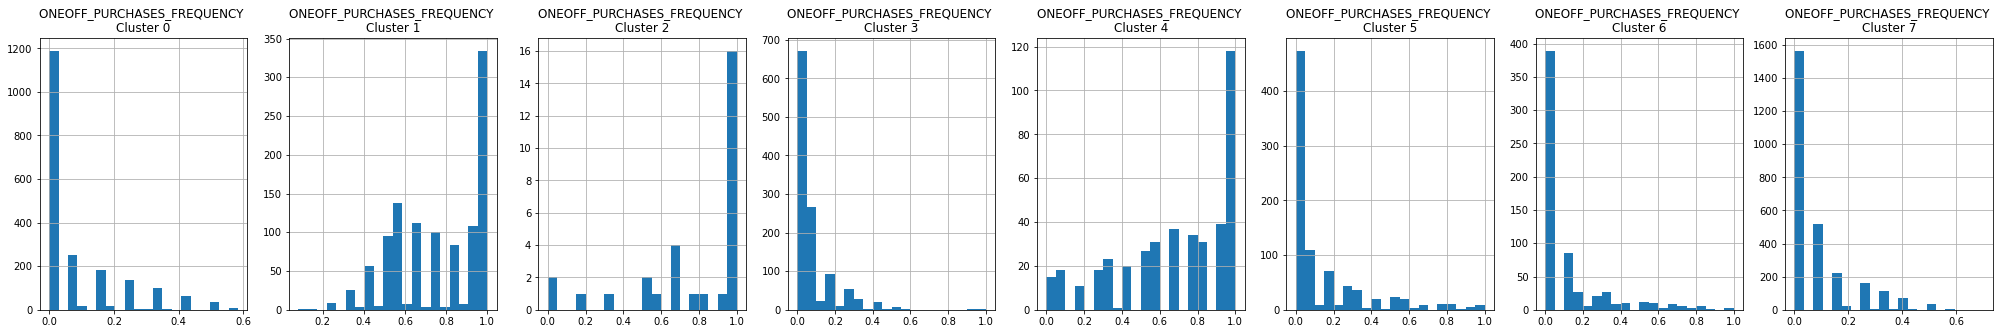

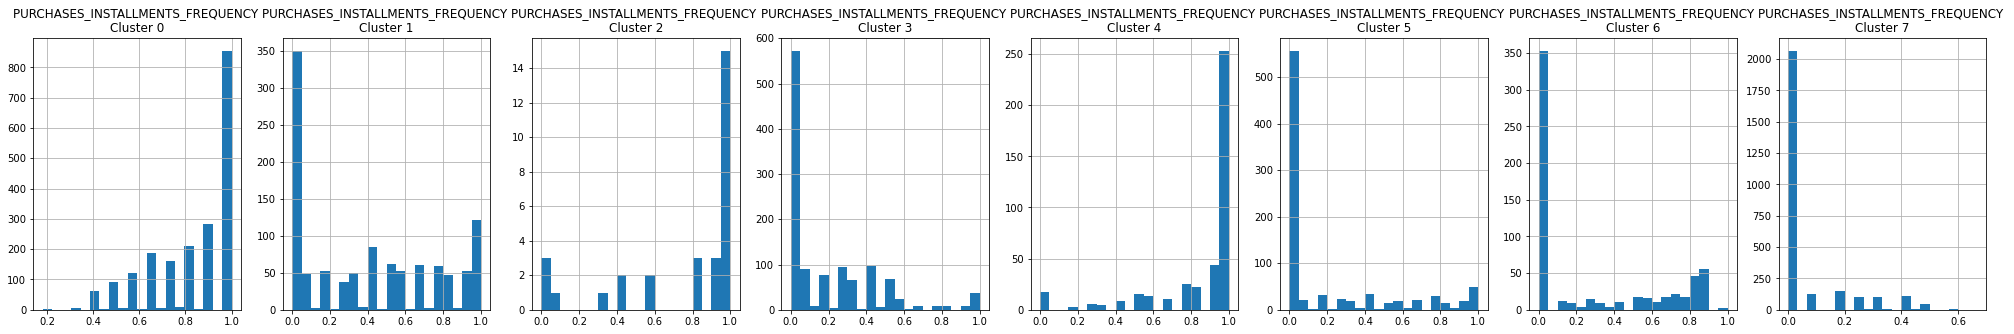

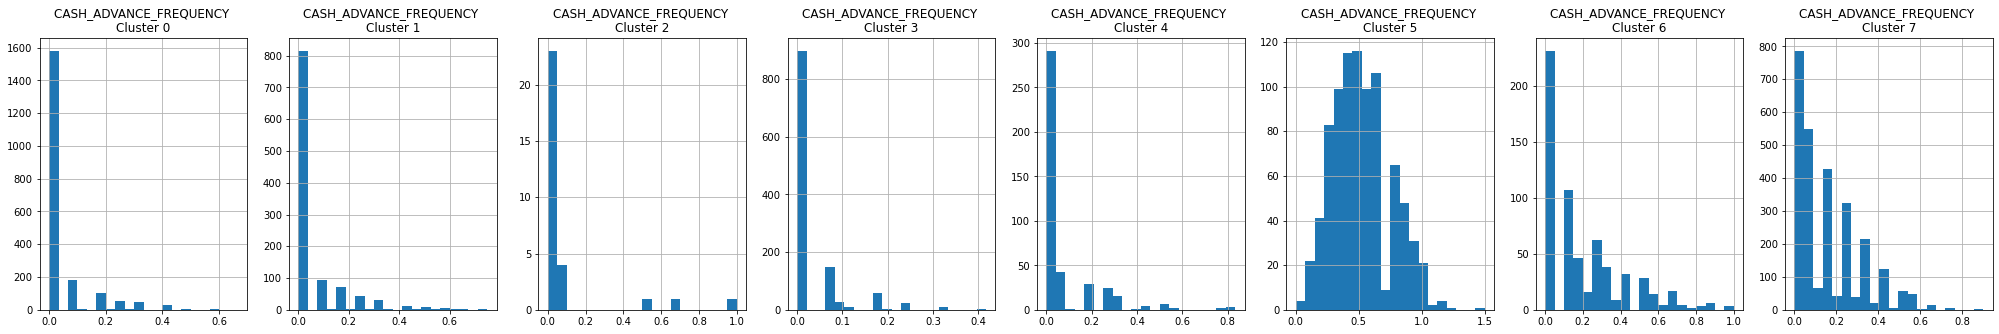

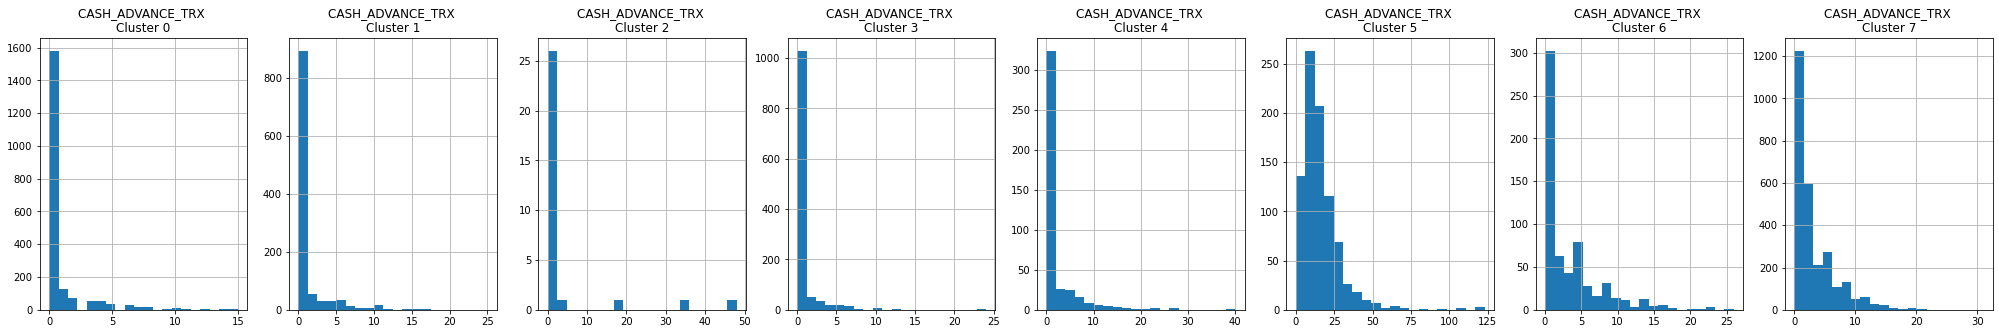

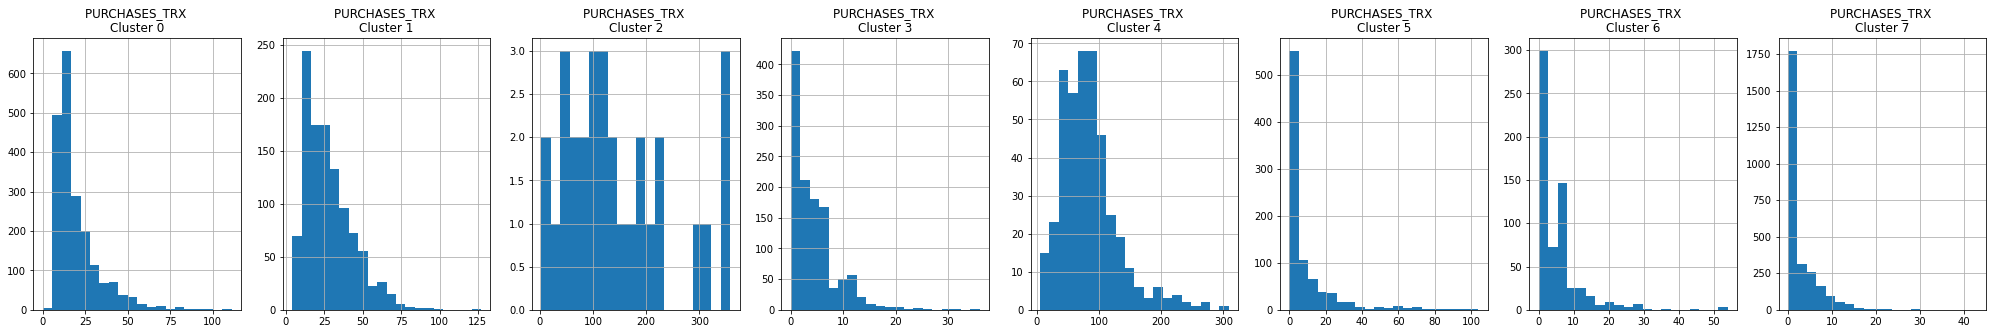

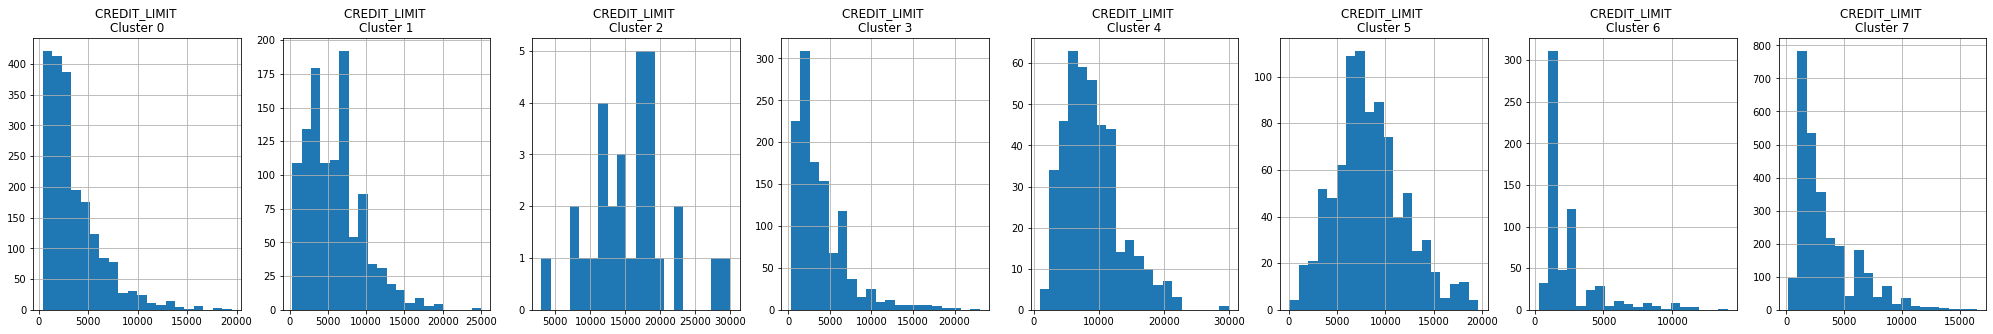

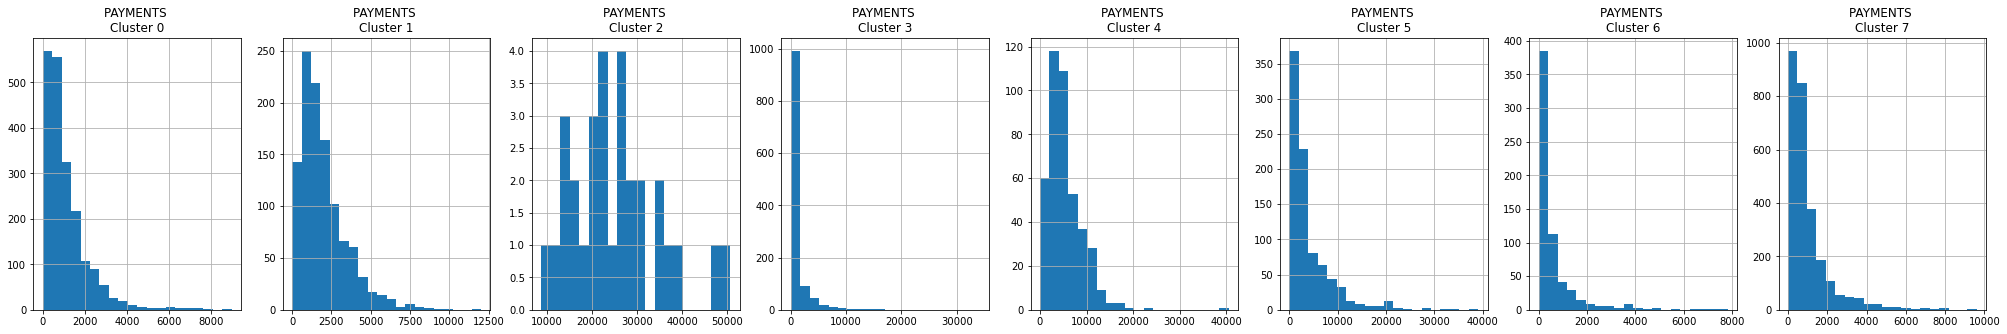

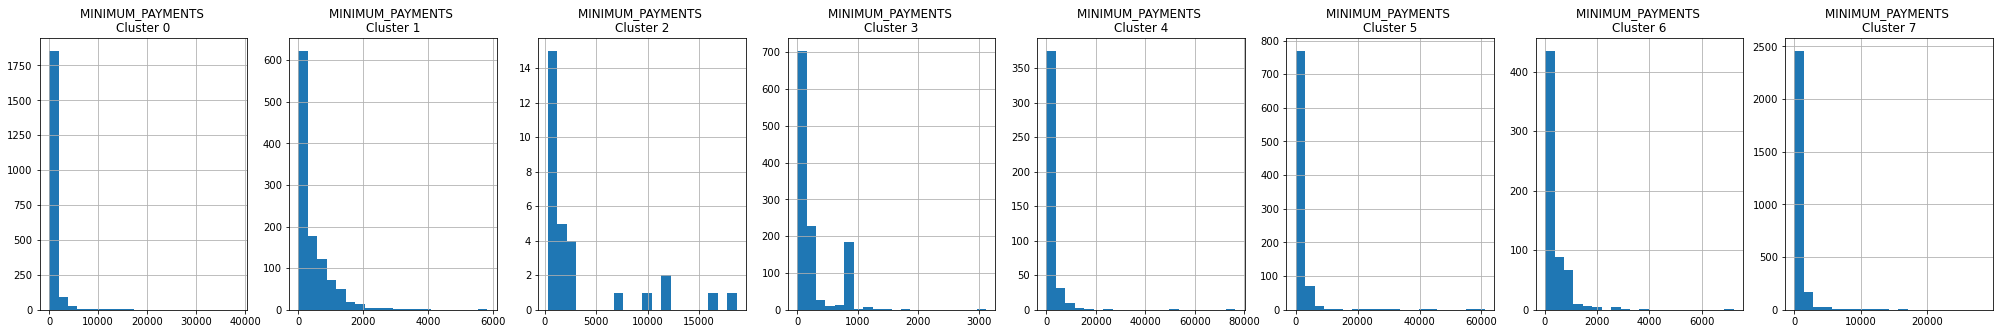

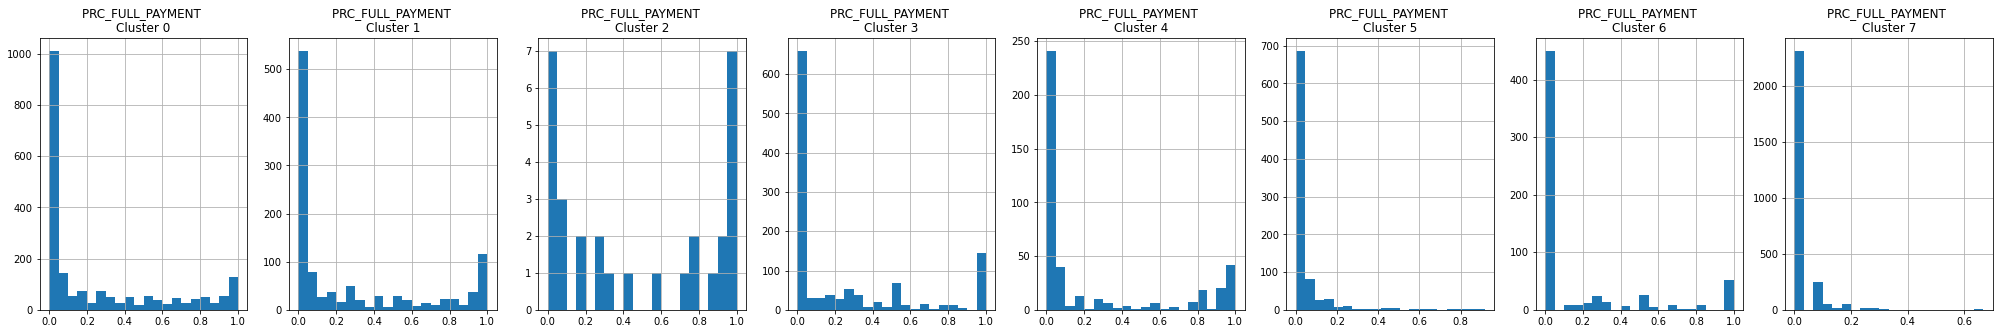

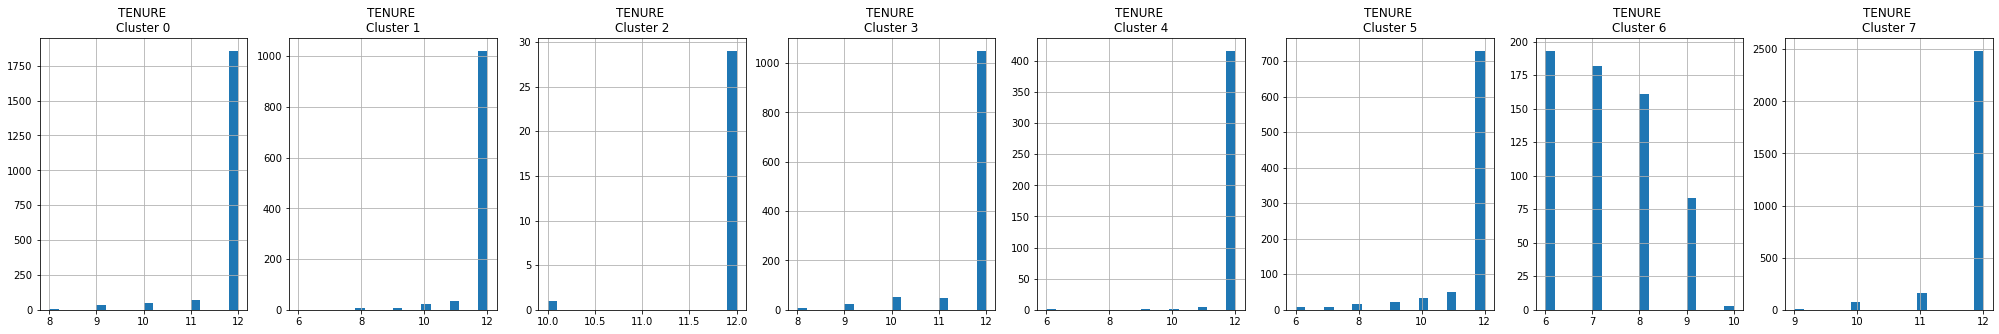

In [36]:
#Plot the histograms of various clusters

for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist( bins=20)
        plt.title('{} \nCluster {}'.format(i,j))
plt.show()

### Apply Principle Components Analysis And Visualize The Results

In [37]:
# Obtaining PCA components

pca = PCA(n_components=2)
principle_comp = pca.fit_transform(df_scaled)
principle_comp

array([[-1.68222147, -1.076456  ],
       [-1.13829805,  2.50645807],
       [ 0.96968745, -0.38352766],
       ...,
       [-0.92620464, -1.81077793],
       [-2.3365502 , -0.65798274],
       [-0.55641615, -0.40048891]])

In [38]:
# Create a dataframe with 2 components

pca_df = pd.DataFrame(data= principle_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076456
1,-1.138298,2.506458
2,0.969687,-0.383528
3,-0.873632,0.043187
4,-1.599434,-0.688592


In [39]:
# Concatenate the clusters labels with pca dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076456,7
1,-1.138298,2.506458,5
2,0.969687,-0.383528,1
3,-0.873632,0.043187,7
4,-1.599434,-0.688592,7


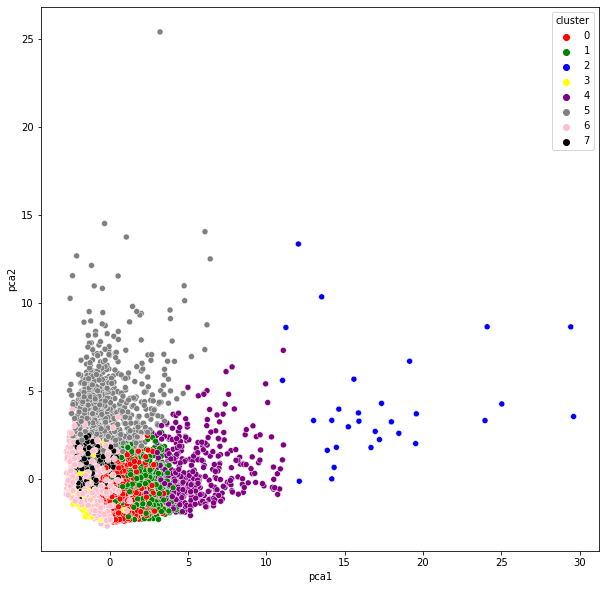

In [40]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',data=pca_df,hue='cluster',palette=['red','green','blue','yellow','purple','grey','pink','black'])

### Apply Auto Encoders - Perform dimensionality reduction using auto encoders

In [41]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
#from keras.optimizers import SGD

In [42]:
input_df = Input(shape=(17,))

In [43]:
encoding_dim = 7

In [44]:
x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation='relu',kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu',kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu',kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu',kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu',kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

In [45]:
# Autoencoder

autoencoder = Model(input_df,decoded)

# Encoder

encoder = Model(input_df,encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
df_scaled.shape

(8950, 17)

In [47]:
autoencoder.fit(df_scaled,df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 53ms/step - loss: 0.6461
Epoch 2/25
70/70 [==============================] - 4s 54ms/step - loss: 0.4706
Epoch 3/25
70/70 [==============================] - 4s 54ms/step - loss: 0.4075
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.3845
Epoch 5/25
70/70 [==============================] - 4s 54ms/step - loss: 0.3570
Epoch 6/25
70/70 [==============================] - 4s 54ms/step - loss: 0.3458
Epoch 7/25
70/70 [==============================] - 4s 55ms/step - loss: 0.3334
Epoch 8/25
70/70 [==============================] - 4s 54ms/step - loss: 0.3183
Epoch 9/25
70/70 [==============================] - 4s 54ms/step - loss: 0.3166
Epoch 10/25
70/70 [==============================] - 4s 53ms/step - loss: 0.3017
Epoch 11/25
70/70 [==============================] - 4s 53ms/step - loss: 0.2949
Epoch 12/25
70/70 [==============================] - 4s 54ms/step - loss: 0.2835
Epoch 13/25
70/70 [==================

In [48]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [49]:
pred = encoder.predict(df_scaled)

In [50]:
pred.shape

(8950, 10)

In [51]:
# optimal number of clusters

scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

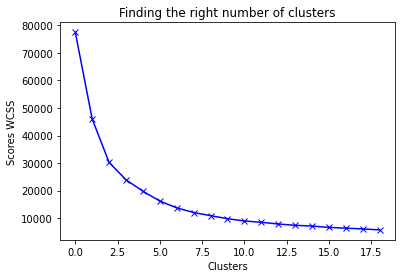

In [52]:
plt.plot(scores_2, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [53]:
kmeans= KMeans(4)
kmeans.fit(pred)
labels= kmeans.labels_

df_cluster_dr = pd.concat([df,pd.DataFrame({'cluster':labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [54]:
# PCA

pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
prin_comp

pca_df_ = pd.DataFrame(data= prin_comp, columns=['pca1','pca2'])
pca_df_.head()

,pca1,pca2
0,-0.900464,-0.087728
1,1.334739,-1.079612
2,0.166620,0.468567
3,-1.135190,-0.024333
4,-0.653418,-0.262288


In [55]:
# Concatenate the clusters labels with pca dataframe

pca_df_ = pd.concat([pca_df_, pd.DataFrame({'cluster':labels})], axis=1)
pca_df_.head()

,pca1,pca2,cluster
0,-0.900464,-0.087728,0
1,1.334739,-1.079612,3
2,0.166620,0.468567,0
3,-1.135190,-0.024333,0
4,-0.653418,-0.262288,0


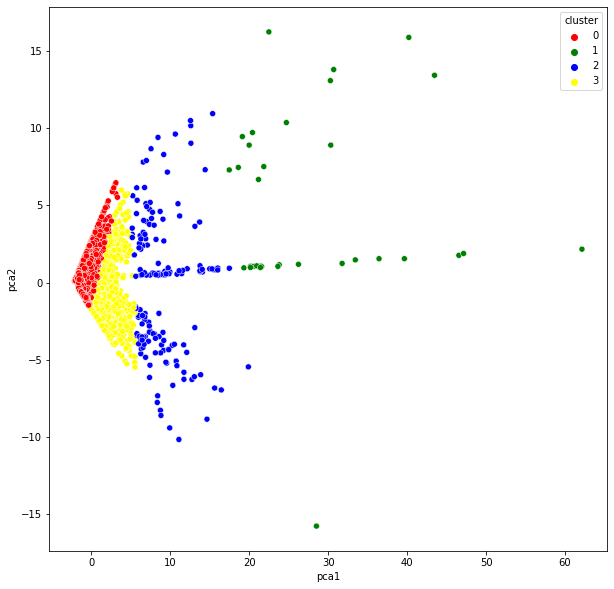

In [56]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',data=pca_df_,hue='cluster',palette=['red','green','blue','yellow'])